<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/lab3t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

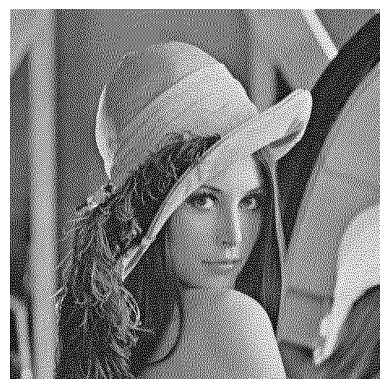

In [ ]:
# @title Modify the diffusion weights in the error diffusion method
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Load the image as grayscale
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
img = Image.open(path).convert("L")
image = np.array(img)
errormatrix = np.array([
    [0.0, 0.0, 7/16],
    [3/16, 5/16, 1/16]
])
h, w = image.shape
errordiffused = np.copy(image)
for i in range(h):
    for j in range(w):
        oldpixel = errordiffused[i, j]
        newpixel = 0 if oldpixel < 128 else 255
        error = oldpixel - newpixel
        errordiffused[i, j] = newpixel
        for x in range(2):
            for y in range(-1, 2):
                new_i = i + x
                new_j = j + y
                if 0 <= new_i < h and 0 <= new_j < w:
                    errordiffused[new_i, new_j] = np.clip(
                        errordiffused[new_i, new_j] + error * errormatrix[x, y + 1], 0, 255
                    )
plt.imshow(errordiffused, cmap="gray")
plt.axis("off")
plt.show()


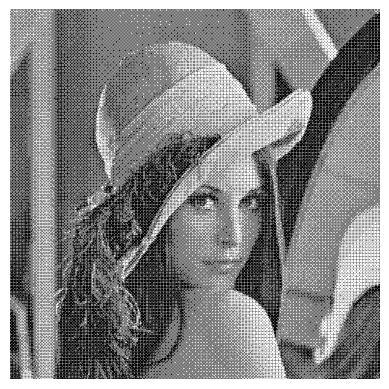

In [ ]:
# @title his method applies a Bayer matrix (DitherArray) for ordered dithering over an image.
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
img = Image.open(path).convert("L")
ditheringImage = img.copy()

# Original Dither Array (8x8 Bayer matrix)
DitherArray_old = [
    [0, 32, 8, 40, 2, 34, 10, 42],
    [48, 16, 56, 24, 50, 18, 58, 26],
    [12, 44, 4, 36, 14, 46, 6, 38],
    [60, 28, 52, 20, 62, 30, 54, 22],
    [3, 35, 11, 43, 1, 33, 9, 41],
    [51, 19, 59, 27, 49, 17, 57, 25],
    [15, 47, 7, 39, 13, 45, 5, 37],
    [63, 31, 55, 23, 61, 29, 53, 21]
]

# Normalize the Dither Array to range [0, 1]
DitherArray = [[(element + 1) / 64 for element in row] for row in DitherArray_old]

# Apply the dithering process
for i in range(0, ditheringImage.width, 8):
    for j in range(0, ditheringImage.height, 8):
        for x in range(8):
            for y in range(8):
                pixel_value = ditheringImage.getpixel((i + x, j + y)) / 255.0
                if pixel_value > DitherArray[x][y]:
                    ditheringImage.putpixel((i + x, j + y), 255)
                else:
                    ditheringImage.putpixel((i + x, j + y), 0)

# Display the dithered image
plt.imshow(ditheringImage, cmap='gray')
plt.axis('off')
plt.show()


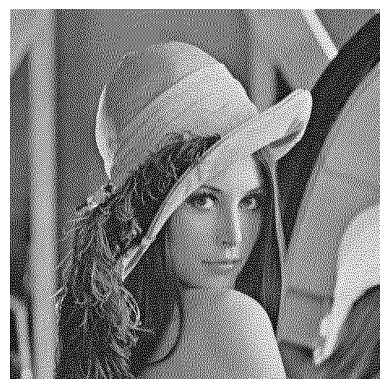

In [ ]:
# @title To refine the code and achieve the best results using the error diffusion method
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
originalImage = Image.open(path).convert("L")
error_diffusion_image = originalImage.copy()
width, height = error_diffusion_image.size

# Define the error diffusion array (Floyd-Steinberg kernel)
error_array = [
    [0.0, 0.0, 0.4375],
    [0.1875, 0.3125, 0.0625]
]

# Error diffusion process
for i in range(height):
    for j in range(width):
        current_pixel = error_diffusion_image.getpixel((j, i))
        new_pixel = 0 if current_pixel < 128 else 255
        error_value = current_pixel - new_pixel
        error_diffusion_image.putpixel((j, i), new_pixel)

        # Apply the error diffusion based on the error_array
        for x in range(2):  # Two rows in the error array
            if i + x >= height:
                continue
            for y in range(-1, 2):  # Three columns in the error array
                if j + y < 0 or j + y >= width:
                    continue
                weight = error_array[x][y + 1]
                if weight == 0:
                    continue
                neighbor_pixel = error_diffusion_image.getpixel((j + y, i + x))
                new_value = neighbor_pixel + error_value * weight
                new_value = int(np.clip(new_value, 0, 255))
                error_diffusion_image.putpixel((j + y, i + x), new_value)

# Display the result
plt.imshow(error_diffusion_image, cmap='gray')
plt.axis('off')
plt.show()
